# **Recap of [Lesson 3](https://colab.research.google.com/drive/1-jVNzMJTRYHhbRlXgGFlhMwdML1L9zMx#forceEdit=true&sandboxMode=true) 👩‍💻🚀**

1. Used pagination for RestAPIs.
2. Used authentication for RestAPIs.
3. Tried dlt RESTClient.
4. Used environment variables to handle both secrets & configs.
5. Learned how to add values to `secrets.toml` or `config.toml`.
6. Used `secrets.toml` ENV variable special for Colab.

---
# **`dlt`’s pre-built Sources and Destinations**


**Here, you will learn:**
- How to initialize verified sources;
- Built-in `rest_api` source.
- Built-in `sql_database` source.
- Built-in `filesystem` source.
- How to switch between destinations.

---

Our verified sources are the simplest way to get started with building your stack. Choose from any of our fully customizable 30+ pre-built sources, such as any SQL database, Google Sheets, Salesforce and others.

With our numerous destinations you can load data to a local database, warehouse or a data lake. Choose from Snowflake, Databricks and more.

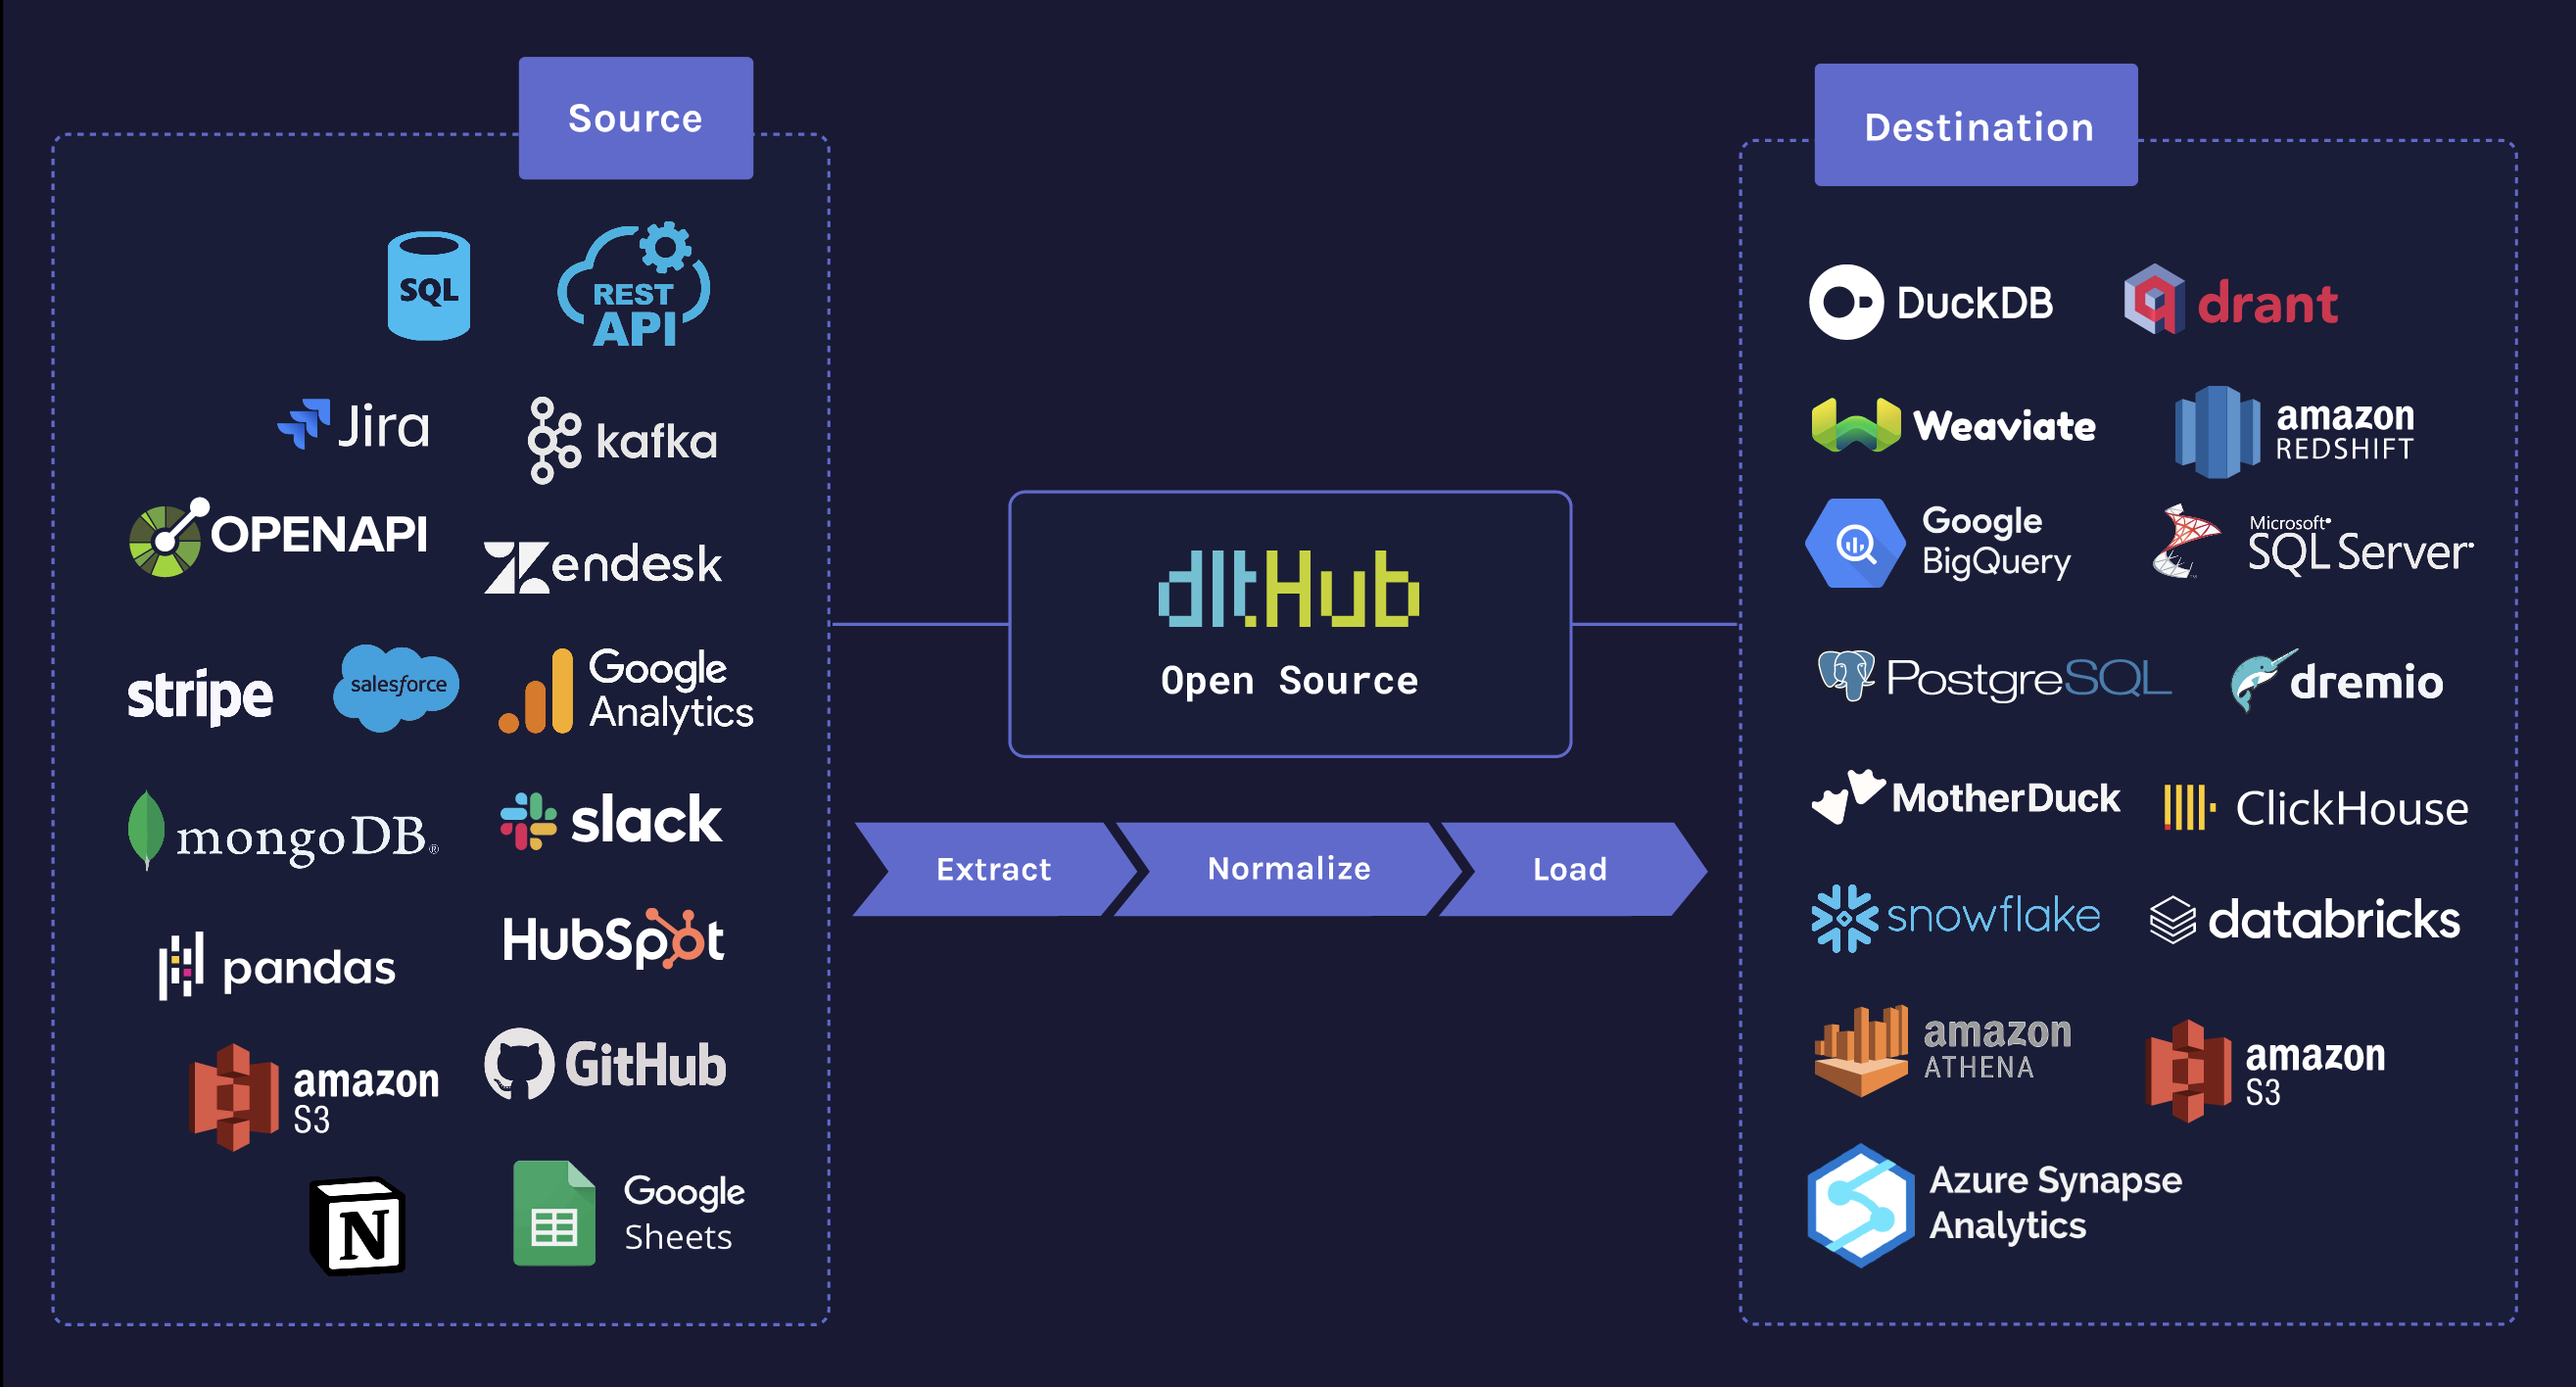

# **Existing verified sources**
To use an [existing verified source](https://dlthub.com/docs/dlt-ecosystem/verified-sources/), just run the `dlt init` command.





There's a base project for each `dlt` verified source + destination combination, which you can adjust according to your needs.

These base project can be initialized with a simple command:

```
dlt init <verified-source> <destination>
```

### Step 0: Install dlt

In [1]:
%%capture
!pip install dlt[duckdb]

List all verified sources:


In [2]:
!dlt init --list-sources

---
Available dlt core sources:
---
filesystem: Reads files in s3, gs or azure buckets using fsspec and provides convenience resources for chunked reading of various file formats
rest_api: Generic API Source
sql_database: Source that loads tables form any SQLAlchemy supported database, supports batching requests and incremental loads.
---
Available dlt single file templates:
---
arrow: The Arrow Pipeline Template will show how to load and transform arrow tables.
dataframe: The DataFrame Pipeline Template will show how to load and transform pandas dataframes.
debug: The Debug Pipeline Template will load a column with each datatype to your destination.
default: The Intro Pipeline Template contains the example from the docs intro page
fruitshop: The Default Pipeline Template provides a simple starting point for your dlt pipeline
github_api: The Github API templates provides a starting point to read data from REST APIs with REST Client helper
requests: The Requests Pipeline Template provid

This command shows all available verified sources and their short descriptions. For each source, it checks if your local `dlt` version requires an update and prints the relevant warning.

Consider an example of a pipeline for the GitHub API:

```
Available dlt single file templates:
---
arrow: The Arrow Pipeline Template will show how to load and transform arrow tables.
dataframe: The DataFrame Pipeline Template will show how to load and transform pandas dataframes.
debug: The Debug Pipeline Template will load a column with each datatype to your destination.
default: The Intro Pipeline Template contains the example from the docs intro page
fruitshop: The Default Pipeline Template provides a simple starting point for your dlt pipeline

---> github_api: The Github API templates provides a starting

point to read data from REST APIs with REST Client helper
requests: The Requests Pipeline Template provides a simple starting point for a dlt pipeline with the requests library
```

### Step 1. Initialize the source

This command will initialize the pipeline example with GitHub API as the source and DuckBD as the destination:

In [3]:
!dlt --non-interactive init github_api duckdb

NOTE: Non interactive mode. Default choices are automatically made for confirmations and prompts.
Looking up verified sources at https://github.com/dlt-hub/verified-sources.git...
Creating and configuring a new pipeline with the dlt core template github_api_pipeline.py (The Github API templates provides a starting point to read data from REST APIs with REST Client helper)

Your new pipeline github_api is ready to be customized!
* Review and change how dlt loads your data in github_api_pipeline.py
* Add credentials for duckdb and other secrets in ./.dlt/secrets.toml
* requirements.txt was created. Install it with:
pip3 install -r requirements.txt
* Read https://dlthub.com/docs/walkthroughs/create-a-pipeline for more information


Now, check  your files on the left side bar. It should contain all the necessary files to run your GitHub API -> DuckDB pipeline:
* `.dlt` folder for `secrets.toml` and `config.toml`;
* pipeline script `github_api_pipeline.py`;
* requirements.txt;
* `.gitignore`.

In [4]:
!ls -a

.  ..  .config	.dlt  github_api_pipeline.py  .gitignore  requirements.txt  sample_data


What you would normally do with the project:
- Add your credentials and define configurations
- Adjust the pipeline script as needed
- Run the pipeline script

> In certain cases, you can adjust the verified source code.

In [5]:
!cat github_api_pipeline.py


"""The Github API templates provides a starting point to read data from REST APIs with REST Client helper"""

# mypy: disable-error-code="no-untyped-def,arg-type"

from typing import Optional

import dlt

from dlt.sources.helpers.rest_client import paginate
from dlt.sources.helpers.rest_client.auth import BearerTokenAuth
from dlt.sources.helpers.rest_client.paginators import HeaderLinkPaginator


@dlt.resource(write_disposition="replace")
def github_api_resource(access_token: Optional[str] = dlt.secrets.value):
    url = "https://api.github.com/repos/dlt-hub/dlt/issues"

    # Github allows both authenticated and non-authenticated requests (with low rate limits)
    auth = BearerTokenAuth(access_token) if access_token else None
    for page in paginate(
        url, auth=auth, paginator=HeaderLinkPaginator(), params={"state": "open", "per_page": "100"}
    ):
        yield page


@dlt.source
def github_api_source(access_token: Optional[str] = dlt.secrets.value):
    return github_api_r

From the code we can see that this pipeline loads **only "issues" endpoint**, you can adjust this code as you wish: add new endpoints, add additional logic, add transformations, etc.

### Step 2. Add credentials

In Colab is more convenient to use ENVs. In the previous lesson you learned how to configure dlt resource via environment variable.

In the pipeline above we can see that `access_token` variable is `dlt.secrets.value`, it means we should configure this variable.

```python
@dlt.resource(write_disposition="replace")
def github_api_resource(access_token: Optional[str] = dlt.secrets.value):
  ...
```

In [6]:
import os
from google.colab import userdata

os.environ["SOURCES__ACCESS_TOKEN"] = userdata.get('SECRET_KEY')

### Step 3. Run the pipeline

Let's run the pipeline!

In [7]:
!python github_api_pipeline.py

[{'url': 'https://api.github.com/repos/dlt-hub/dlt/issues/2392', 'repository_url': 'https://api.github.com/repos/dlt-hub/dlt', 'labels_url': 'https://api.github.com/repos/dlt-hub/dlt/issues/2392/labels{/name}', 'comments_url': 'https://api.github.com/repos/dlt-hub/dlt/issues/2392/comments', 'events_url': 'https://api.github.com/repos/dlt-hub/dlt/issues/2392/events', 'html_url': 'https://github.com/dlt-hub/dlt/issues/2392', 'id': 2909770105, 'node_id': 'I_kwDOGvRYu86tb5F5', 'number': 2392, 'title': 'Add sql dialect to destination capabilities', 'user': {'login': 'anuunchin', 'id': 88698977, 'node_id': 'MDQ6VXNlcjg4Njk4OTc3', 'avatar_url': 'https://avatars.githubusercontent.com/u/88698977?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/anuunchin', 'html_url': 'https://github.com/anuunchin', 'followers_url': 'https://api.github.com/users/anuunchin/followers', 'following_url': 'https://api.github.com/users/anuunchin/following{/other_user}', 'gists_url': 'https://api.github.co

From the pipeline output we can take pipeline information like pipeline_name, dataset_name, destination path, etc.


> Pipeline **github_api_pipeline** load step completed in 1.23 seconds
1 load package(s) were loaded to destination duckdb and into dataset **github_api_data**
The duckdb destination used duckdb:////content/**github_api_pipeline.duckdb** location to store data
Load package 1733848559.8195539 is LOADED and contains no failed jobs


## Step 4: Explore your data

Let's explore what tables were created in duckdb.

In [8]:
import duckdb

conn = duckdb.connect(f"github_api_pipeline.duckdb")
conn.sql(f"SET search_path = 'github_api_data'")
conn.sql("DESCRIBE").df()

,database,schema,name,column_names,column_types,temporary
0,github_api_pipeline,github_api_data,_dlt_loads,"[load_id, schema_name, status, inserted_at, sc...","[VARCHAR, VARCHAR, BIGINT, TIMESTAMP WITH TIME...",False
1,github_api_pipeline,github_api_data,_dlt_pipeline_state,"[version, engine_version, pipeline_name, state...","[BIGINT, BIGINT, VARCHAR, VARCHAR, TIMESTAMP W...",False
2,github_api_pipeline,github_api_data,_dlt_version,"[version, engine_version, inserted_at, schema_...","[BIGINT, BIGINT, TIMESTAMP WITH TIME ZONE, VAR...",False
3,github_api_pipeline,github_api_data,github_api_resource,"[url, repository_url, labels_url, comments_url...","[VARCHAR, VARCHAR, VARCHAR, VARCHAR, VARCHAR, ...",False
4,github_api_pipeline,github_api_data,github_api_resource__assignees,"[login, id, node_id, avatar_url, gravatar_id, ...","[VARCHAR, BIGINT, VARCHAR, VARCHAR, VARCHAR, V...",False
5,github_api_pipeline,github_api_data,github_api_resource__labels,"[id, node_id, url, name, color, default, descr...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, B...",False


In [10]:
incdata_table = conn.sql("SELECT * FROM github_api_resource").df()
incdata_table

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,milestone__creator__events_url,milestone__creator__received_events_url,milestone__creator__type,milestone__creator__user_view_type,milestone__creator__site_admin,milestone__open_issues,milestone__closed_issues,milestone__state,milestone__created_at,milestone__updated_at
0,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/2392,2909770105,I_kwDOGvRYu86tb5F5,2392,Add sql dialect to destination capabilities,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
1,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/pull/2391,2907577847,PR_kwDOGvRYu86OAtlO,2391,master merge for 1.8.1 release,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
2,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/2390,2906250862,I_kwDOGvRYu86tOd5u,2390,Column extraction getting skipped if all the c...,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
3,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/pull/2389,2905449132,PR_kwDOGvRYu86N5o8H,2389,Fix/added s3 region related to 2349,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
4,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/pull/2387,2905287117,PR_kwDOGvRYu86N5IvI,2387,Updated the adjust a schema and sql configurat...,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/67,1383559918,I_kwDOGvRYu85Sd3Lu,67,deterministic behavior for elements that are u...,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
208,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/64,1373230396,I_kwDOGvRYu85R2dU8,64,implement include and exclude filters in Schem...,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
209,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/63,1371918587,I_kwDOGvRYu85RxdD7,63,[core] customize pipeline with hooks,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
210,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https

# **Built-in sources: RestAPI, SQL database & Filesystem**

## **[RestAPI source](https://dlthub.com/docs/dlt-ecosystem/verified-sources/rest_api/basic)**

`rest_api` is a generic source that you can use to create a `dlt` source from a REST API using a declarative configuration. The majority of REST APIs behave in a similar way; this `dlt` source attempts to provide a declarative way to define a `dlt` source for those APIs.

Using a [declarative configuration](https://dlthub.com/docs/dlt-ecosystem/verified-sources/rest_api/basic#source-configuration), you can define:

- the API endpoints to pull data from,
- their relationships,
- how to handle pagination,
- authentication.

dlt will take care of the rest: **unnesting the data, inferring the schema**, etc., and **writing to the destination**

In previous lesson you've already met Rest API Client. `dlt`’s **[RESTClient](https://dlthub.com/docs/general-usage/http/rest-client)** is the **low level abstraction** that powers the REST API Source.

### Initialize `rest_api` template
You can initialize `rest_api` **template** using `init` command:

In [11]:
!yes | dlt init rest_api duckdb

Creating a new pipeline with the dlt core source rest_api (Generic API Source)
NOTE: Beginning with dlt 1.0.0, the source rest_api will no longer be copied from the verified sources repo but imported from dlt.sources. You can provide the --eject flag to revert to the old behavior.
Do you want to proceed? [Y/n]: 
Your new pipeline rest_api is ready to be customized!
* Review and change how dlt loads your data in rest_api_pipeline.py
* Add credentials for duckdb and other secrets in ./.dlt/secrets.toml
* Add the required dependencies to requirements.txt:
  dlt[duckdb]>=1.8.0
  If the dlt dependency is already added, make sure you install the extra for duckdb to it
  To install with pip: pip3 install 'dlt[duckdb]>=1.8.0'

* Read https://dlthub.com/docs/walkthroughs/create-a-pipeline for more information


In the `rest_api_pipeline.py` script you will find sources for GitHub API and for PokeAPI, which were defined using `rest_api` source and `RESTAPIConfig`.

Since the `rest_api` source is a **built-in source**, you don't have to initialize it. You can **import** it from `dlt.sources` and use it immediately.


### Example

Here's a simplified example of how to configure the REST API source to load `issues` and issue `comments` from GitHub API:



In [12]:
import dlt
from dlt.sources.rest_api import RESTAPIConfig, rest_api_source
from dlt.sources.helpers.rest_client.paginators import PageNumberPaginator

config: RESTAPIConfig = {
    "client": {
        "base_url": "https://api.github.com",
        "auth": {
            "token": dlt.secrets["sources.access_token"], # <--- we already configured access_token above
        },
        "paginator": "header_link" # <---- set up paginator type
    },
    "resources": [  # <--- list resources
        {
            "name": "issues",
            "endpoint": {
                "path": "repos/dlt-hub/dlt/issues",
                "params": {
                    "state": "open",
                },
            },
        },
        {
            "name": "issue_comments", # <-- here we declare dlt.transformer
            "endpoint": {
                "path": "repos/dlt-hub/dlt/issues/{issue_number}/comments",
                "params": {
                    "issue_number": {
                        "type": "resolve", # <--- use type 'resolve' to resolve {issue_number} for transformer
                        "resource": "issues",
                        "field": "number",
                    },

                },
            },
        },
        {
          "name": "contributors",
          "endpoint": {
            "path": "repos/dlt-hub/dlt/contributors",
          },
        },
    ],
}

github_source = rest_api_source(config)


pipeline = dlt.pipeline(
    pipeline_name="rest_api_github",
    destination="duckdb",
    dataset_name="rest_api_data",
    dev_mode=True,
)

load_info = pipeline.run(github_source)
print(load_info)

Pipeline rest_api_github load step completed in 1.15 seconds
1 load package(s) were loaded to destination duckdb and into dataset rest_api_data_20250311113847
The duckdb destination used duckdb:////content/rest_api_github.duckdb location to store data
Load package 1741693127.4871264 is LOADED and contains no failed jobs


In [13]:
pipeline.dataset(dataset_type="default").issues.df()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,milestone__creator__events_url,milestone__creator__received_events_url,milestone__creator__type,milestone__creator__user_view_type,milestone__creator__site_admin,milestone__open_issues,milestone__closed_issues,milestone__state,milestone__created_at,milestone__updated_at
0,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/2392,2909770105,I_kwDOGvRYu86tb5F5,2392,Add sql dialect to destination capabilities,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
1,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/pull/2391,2907577847,PR_kwDOGvRYu86OAtlO,2391,master merge for 1.8.1 release,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
2,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/2390,2906250862,I_kwDOGvRYu86tOd5u,2390,Column extraction getting skipped if all the c...,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
3,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/pull/2389,2905449132,PR_kwDOGvRYu86N5o8H,2389,Fix/added s3 region related to 2349,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
4,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/pull/2387,2905287117,PR_kwDOGvRYu86N5IvI,2387,Updated the adjust a schema and sql configurat...,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/67,1383559918,I_kwDOGvRYu85Sd3Lu,67,deterministic behavior for elements that are u...,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
208,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/64,1373230396,I_kwDOGvRYu85R2dU8,64,implement include and exclude filters in Schem...,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
209,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://github.com/dlt-hub/dlt/issues/63,1371918587,I_kwDOGvRYu85RxdD7,63,[core] customize pipeline with hooks,...,None,None,None,None,NaN,NaN,NaN,None,NaT,NaT
210,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https://api.github.com/repos/dlt-hub/dlt/issue...,https

### **Exercise 1: Run rest_api source**

Explore the cells above and answer the question below using `sql_client` or `pipeline.dataset()`.

#### Question
How many columns has the `issues` table?

###  **Exercise 2: Create dlt source with rest_api**

Add `contributors` endpoint for dlt repository to the `rest_api` configuration:
- resource name is "contributors"
- endpoint path : "repos/dlt-hub/dlt/contributors"
- no parameters

#### Question
How many columns has the `contributors` table?

In [32]:
pipeline.dataset(dataset_type="default").contributors.df()

,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,...,organizations_url,repos_url,events_url,received_events_url,type,user_view_type,site_admin,contributions,_dlt_load_id,_dlt_id
0,rudolfix,17202864,MDQ6VXNlcjE3MjAyODY0,https://avatars.githubusercontent.com/u/172028...,,https://api.github.com/users/rudolfix,https://github.com/rudolfix,https://api.github.com/users/rudolfix/followers,https://api.github.com/users/rudolfix/followin...,https://api.github.com/users/rudolfix/gists{/g...,...,https://api.github.com/users/rudolfix/orgs,https://api.github.com/users/rudolfix/repos,https://api.github.com/users/rudolfix/events{/...,https://api.github.com/users/rudolfix/received...,User,public,False,1368,1741693127.4871264,8Uly7f2tHK3XWQ
1,sh-rp,1155738,MDQ6VXNlcjExNTU3Mzg=,https://avatars.githubusercontent.com/u/115573...,,https://api.github.com/users/sh-rp,https://github.com/sh-rp,https://api.github.com/users/sh-rp/followers,https://api.github.com/users/sh-rp/following{/...,https://api.github.com/users/sh-rp/gists{/gist...,...,https://api.github.com/users/sh-rp/orgs,https://api.github.com/users/sh-rp/repos,https://api.github.com/users/sh-rp/events{/pri...,https://api.github.com/users/sh-rp/received_ev...,User,public,False,294,1741693127.4871264,3uekaA4g1YxEFw
2,steinitzu,1033963,MDQ6VXNlcjEwMzM5NjM=,https://avatars.githubusercontent.com/u/103396...,,https://api.github.com/users/steinitzu,https://github.com/steinitzu,https://api.github.com/users/steinitzu/followers,https://api.github.com/users/steinitzu/followi...,https://api.github.com/users/steinitzu/gists{/...,...,https://api.github.com/users/steinitzu/orgs,https://api.github.com/users/steinitzu/repos,https://api.github.com/users/steinitzu/events{...,https://api.github.com/users/steinitzu/receive...,User,public,False,254,1741693127.4871264,nYtxoUo+yhx8WQ
3,TyDunn,13314504,MDQ6VXNlcjEzMzE0NTA0,https://avatars.githubusercontent.com/u/133145...,,https://api.github.com/users/TyDunn,https://github.com/TyDunn,https://api.github.com/users/TyDunn/followers,https://api.github.com/users/TyDunn/following{...,https://api.github.com/users/TyDunn/gists{/gis...,...,https://api.github.com/users/TyDunn/orgs,https://api.github.com/users/TyDunn/repos,https://api.github.com/users/TyDunn/events{/pr...,https://api.github.com/users/TyDunn/received_e...,User,public,False,252,1741693127.4871264,vhSCrp0JIatZmA
4,burnash,264674,MDQ6VXNlcjI2NDY3NA==,https://avatars.githubusercontent.com/u/264674...,,https://api.github.com/users/burnash,https://github.com/burnash,https://api.github.com/users/burnash/followers,https://api.github.com/users/burnash/following...,https://api.github.com/users/burnash/gists{/gi...,...,https://api.github.com/users/burnash/orgs,https://api.github.com/users/burnash/repos,https://api.github.com/users/burnash/events{/p...,https://api.github.com/users/burnash/received_...,User,public,False,223,1741693127.4871264,5TYls4VNYIxfag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,MiConnell,14168559,MDQ6VXNlcjE0MTY4NTU5,https://avatars.githubusercontent.com/u/141685...,,https://api.github.com/users/MiConnell,https://github.com/MiConnell,https://api.github.com/users/MiConnell/followers,https://api.github.com/users/MiConnell/followi...,https://api.github.com/users/MiConnell/gists{/...,...,https://api.github.com/users/MiConnell/orgs,https://api.github.com/users/MiConnell/repos,https://api.github.com/users/MiConnell/events{...,https://api.github.com/users/MiConnell/receive...,User,public,False,1,1741693127.4871264,1CGBuJdO//CZHQ
87,mhauzirek,1830015,MDQ6VXNlcjE4MzAwMTU=,https://avatars.githubusercontent.com/u/183001...,,https://api.github.com/users/mhauzirek,https://github.com/mhauzirek,https://api.github.com/users/mhauzirek/followers,https://api.github.com/users/mhauzirek/followi...,https://api.github.com/users/mhauzirek/gists{/...,...,https://api.github.com/users/mhauzirek/orgs,https://api.github.com/users/mhauzirek/repo

---
## **[SQL Databases source](https://dlthub.com/docs/dlt-ecosystem/verified-sources/sql_database/)**

SQL databases are management systems (DBMS) that store data in a structured format, commonly used for efficient and reliable data retrieval.

The `sql_database` verified source loads data to your specified destination using one of the following backends:
* SQLAlchemy,
* PyArrow,
* pandas,
* ConnectorX.

### Initialize `sql_database` template

Initialize dlt template for `sql_database` using `init` command:

In [33]:
!yes | dlt init sql_database duckdb

Creating a new pipeline with the dlt core source sql_database (Source that loads tables form any SQLAlchemy supported database, supports batching requests and incremental loads.)
NOTE: Beginning with dlt 1.0.0, the source sql_database will no longer be copied from the verified sources repo but imported from dlt.sources. You can provide the --eject flag to revert to the old behavior.
Do you want to proceed? [Y/n]: 
Your new pipeline sql_database is ready to be customized!
* Review and change how dlt loads your data in sql_database_pipeline.py
* Add credentials for duckdb and other secrets in ./.dlt/secrets.toml
* Add the required dependencies to requirements.txt:
  dlt[duckdb,sql-database]>=1.8.0
  If the dlt dependency is already added, make sure you install the extra for duckdb to it
  To install with pip: pip3 install 'dlt[duckdb,sql-database]>=1.8.0'

* Read https://dlthub.com/docs/walkthroughs/create-a-pipeline for more information


The `sql_database` source is also a **built-in source**, you don't have to initialize it, just **import** it from `dlt.sources`.

### Example

The example below will show you how you can use dlt to load data from a SQL Database (PostgreSQL, MySQL, SQLight, Oracle, IBM DB2, etc.) into destination.

To make it easy to reproduce, we will be loading data from the [public MySQL RFam database](https://docs.rfam.org/en/latest/database.html) into a local DuckDB instance.

In [34]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.5 MB/s eta 0:00:00


In [35]:
from dlt.sources.sql_database import sql_database

source = sql_database(
    "mysql+pymysql://rfamro@mysql-rfam-public.ebi.ac.uk:4497/Rfam",
    table_names=["family",]
)

pipeline = dlt.pipeline(
    pipeline_name="sql_database_example",
    destination="duckdb",
    dataset_name="sql_data",
    dev_mode=True,
)

load_info = pipeline.run(source)
print(load_info)

Pipeline sql_database_example load step completed in 2.45 seconds
1 load package(s) were loaded to destination duckdb and into dataset sql_data_20250311115712
The duckdb destination used duckdb:////content/sql_database_example.duckdb location to store data
Load package 1741694232.4620762 is LOADED and contains no failed jobs


### **Exercise 3: Run sql_database source**

Explore the cells above and answer the question below using `sql_client` or `pipeline.dataset()`.

#### Question
How many columns does the `family` table have?

In [36]:
pipeline.dataset(dataset_type="default").family.df()

,rfam_acc,rfam_id,auto_wiki,description,author,seed_source,gathering_cutoff,trusted_cutoff,noise_cutoff,comment,...,ecmli_cal_hits,maxl,clen,match_pair_node,hmm_tau,hmm_lambda,created,updated,_dlt_load_id,_dlt_id
0,RF00001,5S_rRNA,1302,5S ribosomal RNA,"Griffiths-Jones SR, Mifsud W, Gardner PP","Szymanski et al, 5S ribosomal database, PMID:1...",38.0,38.0,37.9,5S ribosomal RNA (5S rRNA) is a component of t...,...,225645,196,120,1,-3.7679,0.71820,2013-10-03 20:41:44+00:00,2024-09-09 21:15:12+00:00,1741694232.4620762,rW2Hv8TL7ZQhMA
1,RF00002,5_8S_rRNA,1303,5.8S ribosomal RNA,"Griffiths-Jones SR, Mifsud W","Wuyts et al, European LSU rRNA database, PMID:...",42.0,42.0,41.9,5.8S ribosomal RNA (5.8S rRNA) is a component ...,...,407997,265,154,1,-3.4977,0.71788,2013-10-03 20:47:00+00:00,2024-09-10 04:51:11+00:00,1741694232.4620762,wFkZX8HPEpFHJQ
2,RF00003,U1,1304,U1 spliceosomal RNA,"Griffiths-Jones SR, Mifsud W, Moxon SJ, Ontive...","Zwieb C, The uRNA database, PMID:9016512",66.0,66.0,65.9,U1 is a small nuclear RNA (snRNA) component of...,...,410919,262,166,1,-3.7311,0.71618,2013-10-03 20:57:11+00:00,2024-09-09 21:15:12+00:00,1741694232.4620762,B2IrdXXIdSOjzw
3,RF00004,U2,1305,U2 spliceosomal RNA,"Griffiths-Jones SR, Mifsud W, Gardner PP","The uRNA database, PMID:9016512; Griffiths-Jon...",46.0,46.0,45.9,U2 is a small nuclear RNA (snRNA) component of...,...,404187,292,192,1,-3.4862,0.71304,2013-10-03 20:58:30+00:00,2024-09-10 04:51:11+00:00,1741694232.4620762,LUx3sq5gJDYazA
4,RF00005,tRNA,1306,tRNA,"Eddy SR, Griffiths-Jones SR, Mifsud W",Eddy SR,29.0,29.0,28.9,Transfer RNA (tRNA) molecules are approximatel...,...,281040,217,71,1,-2.6284,0.73562,2013-10-03 21:00:26+00:00,2024-09-10 04:51:11+00:00,1741694232.4620762,nS57y/UEH/A14Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,RF04306,HCV_SL8001,2418,Hepatitis C virus stem-loop SL8001 RNA,"Lamkiewicz K, Triebel S, Marz M","Kevin Lamkiewicz, Sandra Triebel, Manja Marz",41.0,41.2,35.4,Even though Hepatitis C virus (HCV) SL8001 is ...,...,262801,131,58,1,-4.2595,0.71922,2024-04-08 15:35:21+00:00,2024-09-09 21:15:13+00:00,1741694232.4620762,FDXuTb/Myak0vQ
4174,RF04307,HCV_SL8670,2418,Hepatitis C virus stem-loop SL8670,"Lamkiewicz K, Triebel S, Marz M","Kevin Lamkiewicz, Sandra Triebel, Manja Marz",61.0,61.2,39.1,Involved in virus production & is predicted to...,...,223807,184,92,1,-3.3937,0.71863,2024-04-08 16:11:34+00:00,2024-09-09 21:15:13+00:00,1741694232.4620762,hOLqpt7LKmgmKw
4175,RF04308,HCV_SL2531-SL2549,2418,Hepatitis C virus stem-loop SL2531 and SL2549AU,"Lamkiewicz K, Triebel S, Marz M","Kevin Lamkiewicz, Sandra Triebel, Manja Marz",56.0,56.4,37.3,HCV SL2531-SL2549 RNA stem-loops were reported...,...,347613,150,72,1,-3.6824,0.71889,2024-04-10 15:16:58+00:00,2024-09-09 21:15:13+00:00,1741694232.4620762,6YVL7dCr7SUKlg
4176,RF04309,HCV_J7880,2418,Hepatitis C virus J7880 RNA,"Lamkiewicz K, Triebel S, Marz M",Kevin Lamkiewicz; Sandra Triebel; Manja Marz;,90.0,93.3,40.1,multi-loop in the coding region of the NS5B ge...,...,213856,224,123,1,-3.2076,0.71832,2024-06-17 13:59:07+00:00,2024-09-09 21:15:13+00:00,1741694232.4620762,w/S9Xkxk1w3b8Q


---
## **[Filesystem source](https://dlthub.com/docs/dlt-ecosystem/verified-sources/filesystem/)**

The filesystem source allows seamless loading of files from the following locations:

* AWS S3
* Google Cloud Storage
* Google Drive
* Azure Blob Storage
* remote filesystem (via SFTP)
* local filesystem

The filesystem source natively supports CSV, Parquet, and JSONL files and allows customization for loading any type of structured file.


**How filesystem source works**

The Filesystem source doesn't just give you an easy way to load data from both remote and local files — it also comes with a powerful set of tools that let you customize the loading process to fit your specific needs.

Filesystem source loads data in two steps:

1. It accesses the files in your remote or local file storage **without** actually **reading** the content yet. At this point, you can filter files by metadata or name. You can also set up incremental loading to load only new files.
2. The **transformer** **reads** the files' content and yields the records. At this step, you can filter out the actual data, enrich records with metadata from files, or perform incremental loading based on the file content.

### Initialize `filesystem` template

Initialize dlt template for `filesystem` using `init` command:

In [37]:
!yes | dlt init filesystem duckdb

Creating a new pipeline with the dlt core source filesystem (Reads files in s3, gs or azure buckets using fsspec and provides convenience resources for chunked reading of various file formats)
NOTE: Beginning with dlt 1.0.0, the source filesystem will no longer be copied from the verified sources repo but imported from dlt.sources. You can provide the --eject flag to revert to the old behavior.
Do you want to proceed? [Y/n]: 
Your new pipeline filesystem is ready to be customized!
* Review and change how dlt loads your data in filesystem_pipeline.py
* Add credentials for duckdb and other secrets in ./.dlt/secrets.toml
* Add the required dependencies to requirements.txt:
  dlt[duckdb,filesystem]>=1.8.0
  If the dlt dependency is already added, make sure you install the extra for duckdb to it
  To install with pip: pip3 install 'dlt[duckdb,filesystem]>=1.8.0'

* Read https://dlthub.com/docs/walkthroughs/create-a-pipeline for more information


The `filesystem` source is also a **built-in source**, you don't have to initialize it, just **import** it from `dlt.sources`.

### Example

To illustrate how this **built-in source** works, we first download some file to the local (Colab) filesystem.

In [38]:
!mkdir -p local_data && wget -O local_data/userdata.parquet https://www.timestored.com/data/sample/userdata.parquet

--2025-03-11 11:57:59--  https://www.timestored.com/data/sample/userdata.parquet
Resolving www.timestored.com (www.timestored.com)... 139.162.217.116
Connecting to www.timestored.com (www.timestored.com)|139.162.217.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113629 (111K)
Saving to: ‘local_data/userdata.parquet’

local_data/userdata 100%[===================>] 110.97K   488KB/s    in 0.2s    

2025-03-11 11:57:59 (488 KB/s) - ‘local_data/userdata.parquet’ saved [113629/113629]



In [39]:
import dlt
from dlt.sources.filesystem import filesystem, read_parquet

filesystem_resource = filesystem(
  bucket_url="/content/local_data",
  file_glob="**/*.parquet"
)
filesystem_pipe = filesystem_resource | read_parquet()

# We load the data into the table_name table
pipeline = dlt.pipeline(pipeline_name="my_pipeline", destination="duckdb")
load_info = pipeline.run(filesystem_pipe.with_name("userdata"))
print(load_info)

Pipeline my_pipeline load step completed in 0.43 seconds
1 load package(s) were loaded to destination duckdb and into dataset my_pipeline_dataset
The duckdb destination used duckdb:////content/my_pipeline.duckdb location to store data
Load package 1741694286.7837527 is LOADED and contains no failed jobs


### **Exercise 4: Run filesystem source**

Explore the cells above and answer the question below using `sql_client` or `pipeline.dataset()`.

#### Question
How many columns does the `userdata` table have?

How to configure **Cloud Storage** you can read in the official [dlt documentation](https://dlthub.com/docs/dlt-ecosystem/verified-sources/filesystem/basic#configuration).

In [40]:
pipeline.dataset(dataset_type="default").userdata.df()

,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments,_dlt_load_id,_dlt_id
0,2016-02-03 07:55:29+00:00,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02,1741694286.7837527,CAqr25LK0D/vtA
1,2016-02-03 17:04:03+00:00,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,,1741694286.7837527,EzJknDK9kaIcSA
2,2016-02-03 01:09:31+00:00,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,,1741694286.7837527,ETvEJDDZzg4gCw
3,2016-02-03 00:36:21+00:00,4,Denise,Riley,driley3@gmpg.org,Female,140.35.109.83,3576031598965625,China,4/8/1997,90263.05,Senior Cost Accountant,,1741694286.7837527,VN6dFzzAaEWoAg
4,2016-02-03 05:05:31+00:00,5,Carlos,Burns,cburns4@miitbeian.gov.cn,,169.113.235.40,5602256255204850,South Africa,,NaN,,,1741694286.7837527,ZGc/w29nUoVcfQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2016-02-03 10:30:59+00:00,996,Dennis,Harris,dharrisrn@eepurl.com,Male,178.180.111.236,374288806662929,Greece,7/8/1965,263399.54,Editor,,1741694286.7837527,nnb1bnvvC3E6NQ
996,2016-02-03 17:16:53+00:00,997,Gloria,Hamilton,ghamiltonro@rambler.ru,Female,71.50.39.137,,China,4/22/1975,83183.54,VP Product Management,,1741694286.7837527,+n1eodrU8491BQ
997,2016-02-03 05:02:20+00:00,998,Nancy,Morris,nmorrisrp@ask.com,,6.188.121.221,3553564071014997,Sweden,5/1/1979,NaN,Junior Executive,,1741694286.7837527,Gy+xEaExE1lY3w
998,2016-02-03 02:41:32+00:00,999,Annie,Daniels,adanielsrq@squidoo.com,Female,97.221.132.35,30424803513734,China,10/9/1991,18433.85,Editor,​,1741694286.7837527,ANEdOVm7KMar/w


# **Built-in Destinations**

https://dlthub.com/docs/dlt-ecosystem/destinations/

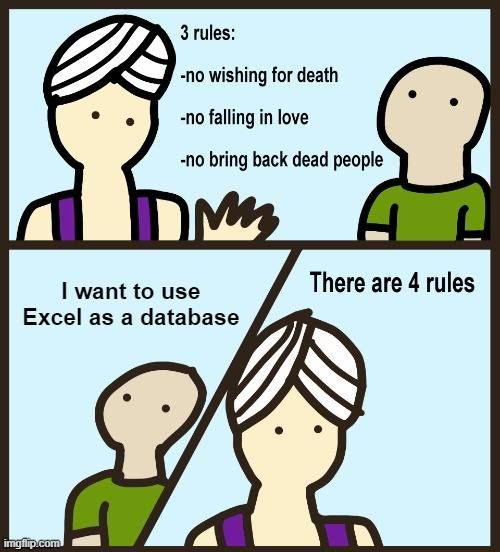

---
##  **Exploring `dlt` destinations**


TBH this is a matter of simply going through the [documentation](https://dlthub.com/docs/dlt-ecosystem/destinations/) 👀, but to sum it up:
- Most likely the destination where you want to load data is already a `dlt` integration that undergoes several hundred automated tests every day.
- If not, you can simply define a custom destination and still be able to benefit from most `dlt`-specific features. FYI, custom destinations will be covered in the next Advanced course, so we expect you to come back for the second part...

## **Choosing a destination**

Switching between destinations in dlt is incredibly straightforward—simply modify the `destination` parameter in your pipeline configuration. For example:

In [41]:
pipeline = dlt.pipeline(
    pipeline_name='data_pipeline',
    destination='duckdb', # <--- to test pipeline locally
    dataset_name='data',
)

pipeline = dlt.pipeline(
    pipeline_name='data_pipeline',
    destination='bigquery', # <--- to run pipeline in production
    dataset_name='data',
)

2025-03-11 11:58:47,460|[WARNING]|508|140170732888064|dlt|pipeline.py|_state_to_props:1641|The destination dlt.destinations.duckdb:None in state differs from destination dlt.destinations.bigquery:bigquery in pipeline and will be ignored


This flexibility allows you to easily transition from local development to production-grade environments.



## **Filesystem destination**

The `filesystem` destination enables you to load data into **files stored locally** or in **cloud storage** solutions, making it an excellent choice for lightweight testing, prototyping, or file-based workflows.

Below is an **example** demonstrating how to use the `filesystem` destination to load data in **Parquet** format:

* Step 1: Set up a local bucket or cloud directory for storing files


In [42]:
import os

os.environ["BUCKET_URL"] = "/content"

* Step 2: Define the data source

In [43]:
import dlt
from dlt.sources.sql_database import sql_database

source = sql_database(
    "mysql+pymysql://rfamro@mysql-rfam-public.ebi.ac.uk:4497/Rfam",
    table_names=["family",]
)


pipeline = dlt.pipeline(
    pipeline_name='fs_pipeline',
    destination='filesystem', # <--- change destination to 'filesystem'
    dataset_name='fs_data',
)

load_info = pipeline.run(source, loader_file_format="parquet") # <--- choose a file format: parquet, csv or jsonl
print(load_info)

Pipeline fs_pipeline load step completed in 0.01 seconds
1 load package(s) were loaded to destination filesystem and into dataset fs_data
The filesystem destination used file:///content location to store data
Load package 1741694335.8098576 is LOADED and contains no failed jobs


Look at the files:

In [44]:
! ls fs_data/family

1741694335.8098576.976ad39411.parquet


Look at the loaded data:

In [45]:
# explore loaded data
pipeline.dataset(dataset_type="default").family.df()

,rfam_acc,rfam_id,auto_wiki,description,author,seed_source,gathering_cutoff,trusted_cutoff,noise_cutoff,comment,...,ecmli_cal_hits,maxl,clen,match_pair_node,hmm_tau,hmm_lambda,created,updated,_dlt_load_id,_dlt_id
0,RF00001,5S_rRNA,1302,5S ribosomal RNA,"Griffiths-Jones SR, Mifsud W, Gardner PP","Szymanski et al, 5S ribosomal database, PMID:1...",38.0,38.0,37.9,5S ribosomal RNA (5S rRNA) is a component of t...,...,225645,196,120,1,-3.7679,0.71820,2013-10-03 20:41:44+00:00,2024-09-09 21:15:12+00:00,1741694335.8098576,f3bB++7flct04w
1,RF00002,5_8S_rRNA,1303,5.8S ribosomal RNA,"Griffiths-Jones SR, Mifsud W","Wuyts et al, European LSU rRNA database, PMID:...",42.0,42.0,41.9,5.8S ribosomal RNA (5.8S rRNA) is a component ...,...,407997,265,154,1,-3.4977,0.71788,2013-10-03 20:47:00+00:00,2024-09-10 04:51:11+00:00,1741694335.8098576,e/CdRBn0Sbm6vg
2,RF00003,U1,1304,U1 spliceosomal RNA,"Griffiths-Jones SR, Mifsud W, Moxon SJ, Ontive...","Zwieb C, The uRNA database, PMID:9016512",66.0,66.0,65.9,U1 is a small nuclear RNA (snRNA) component of...,...,410919,262,166,1,-3.7311,0.71618,2013-10-03 20:57:11+00:00,2024-09-09 21:15:12+00:00,1741694335.8098576,vISrZqoIMLdfYA
3,RF00004,U2,1305,U2 spliceosomal RNA,"Griffiths-Jones SR, Mifsud W, Gardner PP","The uRNA database, PMID:9016512; Griffiths-Jon...",46.0,46.0,45.9,U2 is a small nuclear RNA (snRNA) component of...,...,404187,292,192,1,-3.4862,0.71304,2013-10-03 20:58:30+00:00,2024-09-10 04:51:11+00:00,1741694335.8098576,/IhijH0vY3bBAQ
4,RF00005,tRNA,1306,tRNA,"Eddy SR, Griffiths-Jones SR, Mifsud W",Eddy SR,29.0,29.0,28.9,Transfer RNA (tRNA) molecules are approximatel...,...,281040,217,71,1,-2.6284,0.73562,2013-10-03 21:00:26+00:00,2024-09-10 04:51:11+00:00,1741694335.8098576,y420OZyWbXrebQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,RF04306,HCV_SL8001,2418,Hepatitis C virus stem-loop SL8001 RNA,"Lamkiewicz K, Triebel S, Marz M","Kevin Lamkiewicz, Sandra Triebel, Manja Marz",41.0,41.2,35.4,Even though Hepatitis C virus (HCV) SL8001 is ...,...,262801,131,58,1,-4.2595,0.71922,2024-04-08 15:35:21+00:00,2024-09-09 21:15:13+00:00,1741694335.8098576,TgpcWItUt7CYuQ
4174,RF04307,HCV_SL8670,2418,Hepatitis C virus stem-loop SL8670,"Lamkiewicz K, Triebel S, Marz M","Kevin Lamkiewicz, Sandra Triebel, Manja Marz",61.0,61.2,39.1,Involved in virus production & is predicted to...,...,223807,184,92,1,-3.3937,0.71863,2024-04-08 16:11:34+00:00,2024-09-09 21:15:13+00:00,1741694335.8098576,dxOA5LA8dCtteQ
4175,RF04308,HCV_SL2531-SL2549,2418,Hepatitis C virus stem-loop SL2531 and SL2549AU,"Lamkiewicz K, Triebel S, Marz M","Kevin Lamkiewicz, Sandra Triebel, Manja Marz",56.0,56.4,37.3,HCV SL2531-SL2549 RNA stem-loops were reported...,...,347613,150,72,1,-3.6824,0.71889,2024-04-10 15:16:58+00:00,2024-09-09 21:15:13+00:00,1741694335.8098576,lY5PF+PN1eY5gA
4176,RF04309,HCV_J7880,2418,Hepatitis C virus J7880 RNA,"Lamkiewicz K, Triebel S, Marz M",Kevin Lamkiewicz; Sandra Triebel; Manja Marz;,90.0,93.3,40.1,multi-loop in the coding region of the NS5B ge...,...,213856,224,123,1,-3.2076,0.71832,2024-06-17 13:59:07+00:00,2024-09-09 21:15:13+00:00,1741694335.8098576,QMoho77Jw/oqVA


### **Table formats: [Delta tables & Iceberg](https://dlthub.com/docs/dlt-ecosystem/destinations/delta-iceberg)**

dlt supports writing **Delta** and **Iceberg** tables when using the `filesystem` destination.

**How it works:**

dlt uses the `deltalake` and `pyiceberg` libraries to write Delta and Iceberg tables, respectively. One or multiple Parquet files are prepared during the extract and normalize steps. In the load step, these Parquet files are exposed as an Arrow data structure and fed into `deltalake` or `pyiceberg`.

In [46]:
%%capture
!pip install "dlt[pyiceberg]"

In [47]:
load_info = pipeline.run(
    source,
    loader_file_format="parquet",
    table_format="iceberg",  # <--- choose a table format: delta or iceberg
)
print(load_info)

Pipeline fs_pipeline load step completed in 3.55 seconds
1 load package(s) were loaded to destination filesystem and into dataset fs_data
The filesystem destination used file:///content location to store data
Load package 1741694361.231989 is LOADED and contains no failed jobs


**Note:**

Open source version of dlt supports basic functionality for **iceberg**, but the dltHub team is currently working on an **extended** and **more powerful** integration with iceberg.

[Join the waiting list to learn more about dlt+ and Iceberg.](https://info.dlthub.com/waiting-list)

# **Spoiler: Custom Sources & Destinations**

`dlt` tried to simplify as much as possible both the process of creating sources ([RestAPI Client](https://dlthub.com/docs/general-usage/http/rest-client), [rest_api source](https://dlthub.com/docs/dlt-ecosystem/verified-sources/rest_api)) and [custom destinations](https://dlthub.com/docs/dlt-ecosystem/destinations/destination).

We will look at this topic in more detail in the next Advanced course.

✅ ▶ Proceed to the [next lesson](https://colab.research.google.com/drive/1Zf24gIVMNNj9j-gtXFl8p0orI9ttySDn#forceEdit=true&sandboxMode=true)!